# Regression
### Setting import

In [1]:
#from __future__ import print_function
%matplotlib inline
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (16, 10)

### Reading data from csv file

In [2]:
original = pd.read_csv('clean_data_new.csv')
original.head()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,if_popular
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800,1
1,300000000,285,139.082615,961000000,169.0,6.9,4500,0
2,245000000,206647,107.376788,880674609,148.0,6.3,4466,0
3,250000000,49026,112.312950,1084939099,165.0,7.6,9106,1
4,260000000,49529,43.926995,284139100,132.0,6.1,2124,0


### Drop columns that won't be used.

In [3]:
movies = original.drop(['id','runtime'],axis=1)
movies.head()

,budget,popularity,revenue,vote_average,vote_count,if_popular
0,237000000,150.437577,2787965087,7.2,11800,1
1,300000000,139.082615,961000000,6.9,4500,0
2,245000000,107.376788,880674609,6.3,4466,0
3,250000000,112.312950,1084939099,7.6,9106,1
4,260000000,43.926995,284139100,6.1,2124,0


### Check if there is null value

In [4]:
movies.isnull().sum()

budget          0
popularity      0
revenue         0
vote_average    0
vote_count      0
if_popular      0
dtype: int64

In [5]:
movies.describe()

,budget,popularity,revenue,vote_average,vote_count,if_popular
count,4.803000e+03,4803.000000,4.803000e+03,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,6.092172,690.217989,0.205705
std,4.072239e+07,31.816650,1.628571e+08,1.194612,1234.585891,0.404258
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,5.600000,54.000000,0.000000
50%,1.500000e+07,12.921594,1.917000e+07,6.200000,235.000000,0.000000
75%,4.000000e+07,28.313505,9.291719e+07,6.800000,737.000000,0.000000
max,3.800000e+08,875.581305,2.787965e+09,10.000000,13752.000000,1.000000


### Get plot between budget and vote_average.

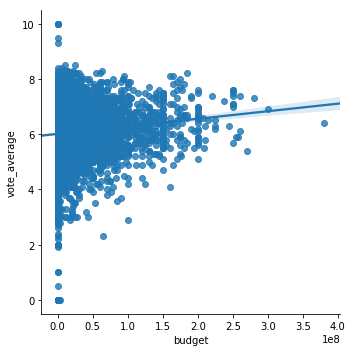

In [6]:
sns.lmplot(x="budget", y="vote_average", data=movies)

### Import linear_model, fit the linear model and print the coefficient.

In [7]:
# from sklearn import linear_model

x = movies[["budget"]]
y = movies[["vote_average"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(x,y)

# Print the coefficients
print (results.intercept_, results.coef_)

[6.01280663] [[2.73247805e-09]]


### Using OLS regression to get result.

In [8]:
# import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, x)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           vote_average   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     2491.
Date:                Tue, 11 Dec 2018   Prob (F-statistic):               0.00
Time:                        22:20:14   Log-Likelihood:                -14581.
No. Observations:                4803   AIC:                         2.916e+04
Df Residuals:                    4802   BIC:                         2.917e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
budget      7.255e-08   1.45e-09     49.913      0.000    6.97e-08    7.54e-08
==============================================================================
Omnibus:                     1921.046   Durbin-Watson:                   0.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8676.573
Skew:                          -1.923   Prob(JB):                         0.00
Kurtosis:                       8.344   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           vote_average   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     42.02
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           9.95e-11
Time:                        22:20:14   Log-Likelihood:                -7647.8
No. Observations:                4803   AIC:                         1.530e+04
Df Residuals:                    4801   BIC:                         1.531e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0128      0.021    285.190      0.000       5.971       6.054
budget      2.732e-09   4.22e-10      6.482      0.000    1.91e-09    3.56e-09
==============================================================================
Omnibus:                     2034.362   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13977.313
Skew:                          -1.882   Prob(JB):                         0.00
Kurtosis:                      10.462   Cond. No.                     6.14e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.14e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linear Regression for vote_average and budget, popularity, revenue.

In [10]:
# vote_average between budget, popularity and revenue

delay_model = ols("vote_average ~ budget + popularity + revenue  -1",data = movies).fit()

delay_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           vote_average   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     1200.
Date:                Tue, 11 Dec 2018   Prob (F-statistic):               0.00
Time:                        22:20:14   Log-Likelihood:                -14241.
No. Observations:                4803   AIC:                         2.849e+04
Df Residuals:                    4800   BIC:                         2.851e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
budget      5.621e-08   2.27e-09     24.726      0.000    5.18e-08    6.07e-08
popularity     0.0711      0.003     26.959      0.000       0.066       0.076
revenue    -6.923e-09   6.79e-10    -10.189      0.000   -8.26e-09   -5.59e-09
==============================================================================
Omnibus:                     4487.236   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           446953.178
Skew:                          -4.145   Prob(JB):                         0.00
Kurtosis:                      49.526   Cond. No.                     7.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linear Regression for if_popular and budget, popularity, revenue.

In [11]:
# if_popular between budget, popularity and revenue

delay_model = ols("if_popular ~ budget + popularity + revenue  -1",data = movies).fit()

delay_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             if_popular   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     382.0
Date:                Tue, 11 Dec 2018   Prob (F-statistic):          1.77e-222
Time:                        22:20:14   Log-Likelihood:                -2503.5
No. Observations:                4803   AIC:                             5013.
Df Residuals:                    4800   BIC:                             5032.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
budget      -7.91e-10   1.97e-10     -4.007      0.000   -1.18e-09   -4.04e-10
popularity     0.0051      0.000     22.420      0.000       0.005       0.006
revenue     2.012e-10    5.9e-11      3.410      0.001    8.55e-11    3.17e-10
==============================================================================
Omnibus:                      922.173   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6748.689
Skew:                           0.720   Prob(JB):                         0.00
Kurtosis:                       8.626   Cond. No.                     7.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusion

We can find there are linear relationship between budget and vote_average. As for multiple linear regression, there are linear relationship between vote_average and the combine of budget, popularity and revenue.

# Logistic linear model

### Getting plot of vote_average-budget axis.

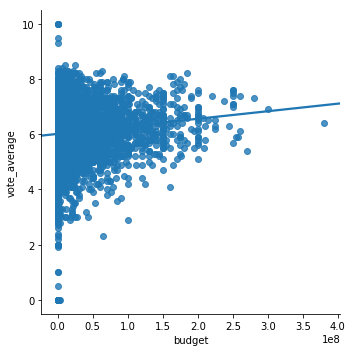

In [12]:
sns.lmplot(y='vote_average', x='budget', data=movies, ci=None)

### Logistic regression for if_popular and budget, popularity, revenue.

In [16]:
predictors = ['budget','popularity','revenue']
model_logistic = sm.Logit(movies['if_popular'], movies[predictors]).fit()
model_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.596718
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             if_popular   No. Observations:                 4803
Model:                          Logit   Df Residuals:                     4800
Method:                           MLE   Df Model:                            2
Date:                Tue, 11 Dec 2018   Pseudo R-squ.:                 -0.1742
Time:                        23:25:51   Log-Likelihood:                -2866.0
converged:                       True   LL-Null:                       -2440.9
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
budget     -3.896e-08    1.8e-09    -21.651      0.000   -4.25e-08   -3.54e-08
popularity     0.0024      0.002      1.587      0.112      -0.001       0.005
revenue     5.358e-09   4.22e-10     12.708      0.000    4.53e-09    6.18e-09
==============================================================================
"""

### Conclusion
There is relationship between if_popular and budget and revenue, as |z|>2.58, which means the result is significant. However, as for popularity, it is not significant because its |z|<1.96.

MIT License

Copyright (c) 2018 Bo Cao

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

<a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/3.0/us/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/">Creative Commons Attribution 3.0 United States License</a>.